# FINAL PROJECT
## Los Angeles, Restaurant

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

I will try to find a good location for a restaurant. I want to place it in a city with high income beacuse I want to get the maximum benefit from it, combining the income ratio and the weather information like uncloudy or semicloudy days (from here http://www.laalmanac.com/weather/we06.php) Los Angeles is my better choice to start the study, and because there is a lot of spanish speakers like me.

I'm going to use data to give a few cities/Communities where to place it, I want a medium-high richness location, because my restaurant are going to be an expensive and select restaurant.

## Data <a name="data"></a>

Factors that will influence my decission are:
* Median rental price
* Median of personal income
* Homeless in the area
* Persons in perma housing
* Median age
* Population
* Number of household
* median of the lengh of residence	
* Unemployed rate
* Number of venues in the area
* Average house income

I decided to use de zip code and their coordenates to difference the areas.

Following data sources will be needed to extract the data needed:
* A lot of Web Scraping from www.laalmanac.com and www.thinkhealthla.org
* Venues and restaurants from the **Foursquare API**

### Data from the web scraping

After extract all the information from webs (you can check it in the notebook "webscraping"), I got this dataframe.

In [1]:
import pandas as pd
data= pd.read_csv('./Data/dfinitivo.csv',index_col=0)

In [2]:
data.loc[data['city'] == "Beverly Hills"]

,postalCode,Median_Income,rental price,city,persons counted 2018,persons counted 2019,persons in perma housing,latitude,longitude,Median Age,Population,Household,median lengh of residence,average house income,Unemployed %,crimes
7,90210,149732,5170,Beverly Hills,18,19,14,34.0901,-118.4065,49.1,23296,9414,11.2,236159,4.16,106
8,90211,71402,3986,Beverly Hills,18,19,14,34.0652,-118.3830,43.5,8537,3707,7.5,149531,4.70,106
9,90212,103032,5212,Beverly Hills,18,19,14,34.0619,-118.3995,44.2,11496,5579,6.9,159286,4.60,106


Well, we can see some places selected by zip code, but first let's put in a map.

In [3]:
import folium
# create map of Los Angeles using latitude and longitude values
map_losangeles = folium.Map(location=[34.0194, -118.411], zoom_start=8.4)

# add markers to map
for lat, lng, label in zip(data['latitude'], data['longitude'], data['city']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_losangeles)  
    
map_losangeles

### foursquare api

I got the map marked by blue circles by every zip code. After that I got venues for every one.

You can check the foursquare notebook if you want, I got the coordinates of every zipcode and make a request for every one, after that I use Kmeans to cluster the venues, after that I assing to the original dataframe the top 3 venues.

## Methodology <a name="methodology"></a>

First I have to say than all methodology is in the others notebooks, please check them if you want to deep inside the method.

In this project I got data for every zip code, with that information I could group them by similarities making clusters, then I remove the worst cluster and save the other 2 clusters.

First step was search  the data and extract it, then clean and merge in a dataframe.
Second step was look for correlations between place's values, with that I could observe the pattern for a good place, using too linear regression between the most important values.

In [ ]:
import matplotlib.pyplot as plt

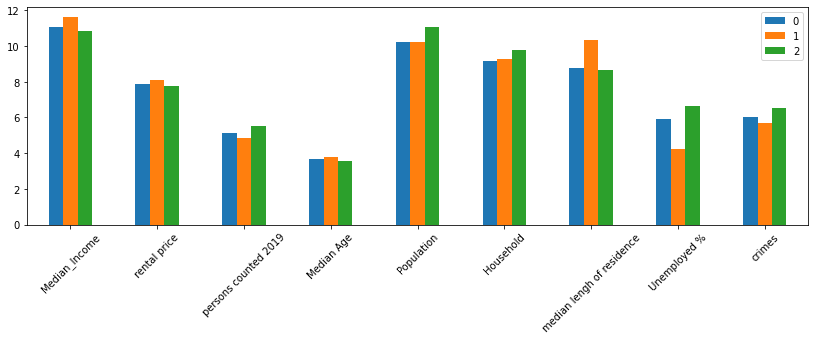

In [6]:
dataplot= pd.read_csv('./Data/dataplot.csv',index_col=0)
dataplot.plot.bar(figsize=(14, 4), rot=45)

In the histogram we can see the difference bettween clusters.
Last step I was focused on cluster the cities/communities, with that I could observe the differences between groups. Thanks to that I could pick the two best cluster. After that I fuse some columns to make easiers to see the differences bettween cities and remove the places with highest crime rate. Then I cluster again inside thats communities based on the pattern for a good place,and finally I place it in a map. In tha map we can observe the differents clouds of communities, but I suggets the Glendale cloud, because there are nine communities with high income, low crimes, etc.
Finally I make an analysis of the results.

## Results and Discussion <a name="results"></a>

The analysis shows that although there is at least four or five places to put the Restaurant.

During the project I was thinking about how much is important the income, the crimes, age, etc, but as you can see in the project the income and the crimes was something to work arround them, that is why I add other variables to them. 
Thanks to the results we can see some good places like Glendale-Bourbank, Temple City, Torrance, Norwalk, Beverly Hills, but as I was saying, the income and crime make the difference, maybe you can think than Beverly Hills will be the better place beacuse they have the highest Income and lowest crime, but it is individually zip values, if you use the cloud value we have the Glendale-Bourbank is the best choice, because It has a combination of the values with a highest average, a rich place and safe place, with nice venues nearest.

In [5]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

data3= pd.read_csv('./Data/data3.csv',index_col=0)
data3cluster= pd.DataFrame({'Median Age':data3['Median Age'],'median lengh of residence':data3['median lengh of residence'],'Unemployed %':data3['Unemployed %'], 'zonemoney':data3['zonemoney']})
# set number of clusters
kclusters =2
# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(data3cluster)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# create map
map_clusters3 = folium.Map(location=[33.8194, -118.211], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data3['latitude'], data3['longitude'], data3['postalCode'], data3['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters3)
       
map_clusters3

Knowing that is important to watch a place in the zone, is important to use a webpage to find a good local, and I dice to use this one https://www.loopnet.com

Loopnet has a good rate, and give a lot of information about the locals, I found this one https://www.loopnet.com/Listing/300-N-Central-Ave-Glendale-CA/9438501/.

It's look the perfect place for the Restaurant like I want, and the possibilities are infinites, and the place is perfect, in a main street that make easier to see from the cars.

As you can see in the venues, Los Angeles has in every neighborhood tons of restaurant, that is beacuse LA has a lot of tourism and of course the weather, every year has arround 300 sunny days, and that make the people want to take a walk, to buy and of course to eat to our restaurant.

But the number of restaurant will be a problem...or not, because the 70% of the restaurant are near to the coast, and 80% are fast food restaurant, that is why I focused a rich place for a expensive and select restaurant. If we make different our restaurant, the people are going to see our restaurant like something different, special, and they are going to pay for that.

Other point in the project was the danger zone like the center, or South, South-East of Los angeles, thanks to the data we can avoid them ;). And of course this communities doesn't have so much income, so it is not a focus for us.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify areas with low number of crimes, nice income, low unemployed and search for optimal location for a new restaurant. By the webscraping we could obtain a very good information and the make cluster into three types, and then drop the worst,we use Foursquare data we have to discover than LA is full of restaurant and to know if our final place has good venues nearest. 

Clustering our communities make us how to work on them, and we could observe the differences, to use them in our own.

Finally we could take the better choice thanks to the data, with a high income, low crime, low homeless and low unemployed. And thanks to the data we know about our future customers, their median age, median leng of residence, purchasing powers, etc. Thanks than they have a high leng of residence, we can focus our restaurant in the people from the neighborhood because usally they doesn't move to another city, and thanks to the income data, we can set a price propertly to them.